In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''--------- 1. Data Manipulation ---------'''
import numpy as np
import pandas as pd
'''--------- 2. Data Preprocessing ---------'''
from sklearn.preprocessing import LabelEncoder #Encode Non-numeric Var
from sklearn.preprocessing import MinMaxScaler # Feature Scaling
from sklearn.model_selection import train_test_split #Train Test Validation Split
'''--------- 3. Data Visualization ---------'''
import matplotlib.pyplot as plt
'''--------- 4. Model Training ---------'''
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
'''--------- 5. Model Evluation ---------'''
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## 1. Dataset
### Dataset 1
**About dataset**
- 900 ~30 second audio clips gathered from AllMusic API
- Annotated into 4 quadrants based on valance and arousal according to Russell's model
- Audios are organized in 4 folders (Q1 to Q4)
- Equally stratified dataset with each classes 250 songs

**Acknowledgements**<br>
Source: http://mir.dei.uc.pt/downloads.html

**If you use it, please cite the following article(s):**

Panda R., Malheiro R. & Paiva R. P. (2018). "Novel audio features for music emotion recognition". IEEE Transactions on Affective Computing (IEEE early access). DOI: 10.1109/TAFFC.2018.2820691.

Panda R., Malheiro R., Paiva R. P. (2018). "Musical Texture and Expressivity Features for Music Emotion Recognition". 19th International Society for Music Information Retrieval Conference -- ISMIR 2018, Paris, France.

In [3]:
# Read dataset1
df1 = pd.read_excel("D:/UM/Project/Mozartify/project/Datasets/Features/Features1D/Features1D.xlsx")
df1

,Unnamed: 0,file,scale,key,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,...,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20,mood
0,0,D:/UM/Project/Mozartify/project/Datasets/audio...,major,D,135.999178,0.171184,0.003348,0.344088,0.098565,2289.203183,...,97.696182,-3.537810,71.402687,-0.436729,66.260963,-0.202857,59.259083,0.894741,47.133595,happy
1,1,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,107.666016,0.106427,0.000725,0.416452,0.090011,2129.307062,...,37.896637,-9.209418,46.455044,-1.426528,50.276150,-3.567492,65.857529,1.226228,85.487991,happy
2,2,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.241972,0.010910,0.435837,0.084253,2980.267152,...,67.306412,-6.006174,66.395699,-1.117358,49.001869,-4.630496,50.317497,0.654567,79.517960,happy
3,3,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,107.666016,0.120562,0.002160,0.420664,0.079768,2882.799693,...,33.676331,-4.147554,37.201412,-3.797808,32.774509,-8.426100,32.341358,-6.023935,30.663700,happy
4,4,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,129.199219,0.192818,0.003956,0.274221,0.085475,2146.962603,...,28.778049,-10.854812,36.313950,-0.480542,47.509182,-4.177841,60.641903,6.327812,64.390320,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,968,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,151.999081,0.097105,0.000582,0.293956,0.088207,1997.276683,...,52.399574,-18.951229,71.105469,-6.146902,61.915462,-16.994026,55.398777,-14.183487,64.577774,sad
969,969,D:/UM/Project/Mozartify/project/Datasets/audio...,minor,G#,89.102909,0.083837,0.001618,0.272151,0.084929,1331.011559,...,37.900272,-11.959914,43.625828,-5.335443,40.348934,-10.943409,37.393105,-15.349643,56.387405,sad
970,970,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,99.384014,0.076661,0.000290,0.237400,0.089330,1681.161502,...,46.293671,-5.706831,39.779736,-3.286500,47.729607,1.990399,70.187508,5.452133,70.151512,sad
971,971,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.071242,0.001089,0.263051,0.092084,2075.571372,...,45.630798,-16.532892,45.669132,-11.235711,48.995541,-15.730806,54.862488,-15.158969,68.118660,sad


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     973 non-null    int64  
 1   file           973 non-null    object 
 2   scale          973 non-null    object 
 3   key            973 non-null    object 
 4   tempo          973 non-null    float64
 5   rms_mean       973 non-null    float64
 6   rms_var        973 non-null    float64
 7   chroma_mean    973 non-null    float64
 8   chroma_var     973 non-null    float64
 9   centroid_mean  973 non-null    float64
 10  centroid_var   973 non-null    float64
 11  rolloff_mean   973 non-null    float64
 12  roll_off_var   973 non-null    float64
 13  zcr_mean       973 non-null    float64
 14  zcr_var        973 non-null    float64
 15  tonnetz_mean   973 non-null    float64
 16  tonnetz_var    973 non-null    float64
 17  mel_mean       973 non-null    float64
 18  mel_var   

In [5]:
df1.describe()

,Unnamed: 0,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,rolloff_mean,roll_off_var,...,mfcc_mean_16,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,9.730000e+02,973.000000,9.730000e+02,...,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,486.000000,122.326785,0.118356,0.002878,0.329636,0.088357,1871.439674,3.862950e+05,3796.562374,1.799023e+06,...,-2.049367,70.397937,-3.300858,70.950847,-1.941788,72.751296,-2.665623,76.034758,-1.853424,82.237559
std,281.025206,21.454196,0.056419,0.002753,0.068965,0.006010,658.123865,3.301376e+05,1528.810501,1.418762e+06,...,5.246275,37.247865,5.542685,38.941899,5.093315,40.392693,5.224362,40.732825,4.916512,48.856245
min,0.000000,33.999794,0.006621,0.000022,0.131688,0.065206,375.472632,4.007574e+03,523.105966,1.089884e+04,...,-23.835148,20.954960,-24.893364,21.495405,-20.297907,21.370155,-19.804493,19.875721,-18.626137,17.969856
25%,243.000000,107.666016,0.076826,0.001124,0.280484,0.084610,1382.944669,1.468872e+05,2646.252364,7.196876e+05,...,-5.275205,47.986336,-6.707193,46.685753,-5.123790,48.109035,-5.579427,49.918827,-4.784280,52.087006
50%,486.000000,123.046875,0.108863,0.002086,0.325388,0.088237,1817.264611,2.860354e+05,3743.848123,1.431462e+06,...,-1.367494,61.631184,-4.083600,61.393219,-1.516343,61.805428,-3.003905,64.925056,-1.690674,68.933380
75%,729.000000,135.999178,0.150578,0.003653,0.376347,0.092118,2331.611628,5.280622e+05,4902.536263,2.479123e+06,...,1.586643,83.831070,-0.359441,82.718422,1.710763,85.849907,-0.064738,89.789009,1.351306,97.345245
max,972.000000,198.768029,0.316388,0.023626,0.578017,0.111998,3703.270406,2.775176e+06,7815.759200,8.834975e+06,...,16.275961,435.665466,15.933263,514.815186,13.124250,444.994965,16.365273,392.186249,15.270178,442.129852


In [6]:
numeric_columns = df1.select_dtypes(include=[np.number])

# Group by 'mood' and calculate mean for numeric columns only
grouped_mean = df1.groupby('mood')[numeric_columns.columns].mean()
print(grouped_mean)

       Unnamed: 0       tempo  rms_mean   rms_var  chroma_mean  chroma_var  \
mood                                                                         
happy       161.0  122.184162  0.144312  0.003395     0.378268    0.085952   
relax       485.0  122.180199  0.104465  0.002653     0.307227    0.089406   
sad         810.0  122.615117  0.106450  0.002588     0.303711    0.089698   

       centroid_mean   centroid_var  rolloff_mean  roll_off_var  ...  \
mood                                                             ...   
happy    2365.546454  373575.994834   4914.590015  1.507072e+06  ...   
relax    1561.184667  442691.978249   3120.298016  2.249632e+06  ...   
sad      1690.628556  342538.667756   3361.679261  1.638569e+06  ...   

       mfcc_mean_16  mfcc_var_16  mfcc_mean_17  mfcc_var_17  mfcc_mean_18  \
mood                                                                        
happy     -1.373352    57.319127     -2.999226    58.095549     -1.147069   
relax     -1.9783

### Dataset 2
**About dataset**
- 400 ~30 second audio clips gathered from erbal and non-verbal music from different genres of Turkish music
- Annotated into 4 quadrants based on valance and arousal according to Russell's model.
- Audios are organized in 4 categories - Happy, Sad, Angry, Relax
- Equally stratified dataset with each classes 100 songs

**Acknowledgements**<br>
source:https://www.kaggle.com/datasets/blaler/turkish-music-emotion-dataset

**If you use it, please cite the following article(s):**<br>
Bilal Er, M., & Aydilek, I. B. (2019). Music emotion recognition by using chroma spectrogram and deep visual features. Journal of Computational Intelligent Systems, 12(2), 1622–1634. International Journal of Computational Intelligence Systems, DOI: [Web Link] https://doi.org/10.2991/ijcis.d.191216.001

## 2. Data preprocessing
### 2.1 Define Features and Labels

In [7]:
X1 = df1.drop(['mood'],axis=1)
y1 = df1['mood']
np.unique(y1)

array(['happy', 'relax', 'sad'], dtype=object)

### 2.2 Encode the non-numerical features labels

**Encode the labels in numerical way:**
- Happy: 1 
- Angry: 0 
- Relaxed: 2 
- Sad: 3

In [8]:
le = LabelEncoder()
le.fit(y1)
y1 = le.transform(y1)
np.unique(y1)

array([0, 1, 2])

**Then encode the non-numeric variable scale:**
- major: 0
- minor: 1

In [9]:
X1['scale'].unique()

array(['major', 'minor'], dtype=object)

In [10]:
le.fit(X1['scale'])
X1['scale'] = le.transform(X1['scale'])
X1['scale'].unique()

array([0, 1])

**Finally, encode the non-numeric variable key:**
- A: 0
- A#: 1
- B: 2
- C: 3
- C#: 4
- D: 5
- D#: 6
- E: 7
- F: 8
- F#: 9
- G: 10
- G#: 11

In [11]:
X1['key'].unique()

array(['D', 'E', 'A', 'F', 'C', 'G#', 'G', 'B', 'F#', 'C#', 'A#', 'D#'],
      dtype=object)

In [12]:
le.fit(X1['key'])
X1['key'] = le.transform(X1['key'])
X1['key'].unique()

array([ 5,  7,  0,  8,  3, 11, 10,  2,  9,  4,  1,  6])

### 2.3 Train Test Validation Split
Finally, split the dataset into train and test set, 80% of data are used as train set, 10% of data are used as test set and the remaining ones are used for validation set.

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                        train_size = 0.8, 
                                                        random_state = 13,  
                                                        stratify = y1)

X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, 
                                                      train_size = 0.8, 
                                                      random_state = 13,  
                                                      stratify = y1_train)

### 2.4 Feature Scaling
As the range of the variales varies distinctly, in order to make the learning process better, the features need to be scaled into similar ranges. Here the Min-Max Scaler is used.

In [14]:
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train.drop('file',axis=1))
X1_val_scaled = scaler.fit_transform(X1_val.drop('file',axis=1))
X1_test_scaled = scaler.fit_transform(X1_test.drop('file',axis=1))

## 3. Train the model

### 3.1 Overfitting problems and comparison study for improving the validation accuracy
Using data in dataset 1 as training data, the model always suffers from the overfitting problems regardless of the
adjustment of the parameters and number of input features.

In [15]:
# Define Model Builder of 3 conv1D layers and 2 fully connected layers
# Input data and paras of layers are changable

def modelBuilder3L(X_train,
                  f1,k1,a1,
                  f2,k2,a2,
                  f3,k3,a3,
                  d1,dr1,da1,r1,
                  d2,dr2,da2,r2,
                  num):
    '''
    args:
    
    X_train: training data
    f1,k1,a1: num of filters, filter size and activation func of 1st conv1D layer
    f2,k2,a2: num of filters, filter size and activation func of 2nd conv1D layer
    f3,k3,a3: num of filters, filter size and activation func of 3rd conv1D layer
    d1,dr1,da1, r1: num of units, dropout, activation func and regularizer para of 1st fully connected layer
    d2,dr2,da2, r2: num of units, dropout, activation func and regularizer para of 2nd fully connected layer
    num: integer for distinguishing different model
    
    return:
    model
    
    '''
    model = Sequential(name="Conv1D_"+str(num))
    m,n = X_train.shape
    #layer 1
    model.add(Conv1D(filters = f1, kernel_size = k1, input_shape = (n,1), padding = 'same', activation = a1, name ='Conv1D_1'))
    model.add(BatchNormalization(name = "BN1"))
    model.add(MaxPooling1D(name = "MaxPooling1"))
    #layer 2
    model.add(Conv1D(filters = f2, kernel_size = k2, activation = a2, padding='same', name = "Conv1D_2"))
    model.add(BatchNormalization(name = "BN2"))
    model.add(MaxPooling1D(name = "MaxPooling2"))
    #layer 3
    model.add(Conv1D(filters = f3, kernel_size = k3, activation = a3, padding='same', name = "Conv1D_3"))
    model.add(BatchNormalization(name = "BN3"))
    model.add(MaxPooling1D(name = "MaxPooling3"))
    #Flatten output
    model.add(Flatten(name = "Flatten"))
    #Fully connected layer 4
    model.add(Dense(d1, activation = da1, name = "Dense_1"))
    #Prevent overfitting
    model.add(Dropout(dr1, name = "Dropout_1"))
    #Fully connected layer 6
    model.add(Dense(d2, activation = da2, name = "Dense_2"))
    #Prevent overfitting
    model.add(Dropout(dr2, name = "Dropout_2"))
    #Output layer
    model.add(Dense(4, activation = 'softmax', name = "Softmax"))
    #model compiling
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    model.summary()
    return model

In [16]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0
d2,dr2,da2,r2 = 64,0.2,'relu',0
num = 1

model1 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,548 (189.64 KB)

 Trainable params: 48,388 (189.02 KB)

 Non-trainable params: 160 (640.00 B)

In [17]:
history1 = model1.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2496 - loss: 1.7874 - val_accuracy: 0.0000e+00 - val_loss: 1.4129
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4992 - loss: 1.1019 - val_accuracy: 0.0000e+00 - val_loss: 1.4560
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5645 - loss: 0.9873 - val_accuracy: 0.0000e+00 - val_loss: 1.4878
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6687 - loss: 0.7986 - val_accuracy: 0.1667 - val_loss: 1.5023
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6428 - loss: 0.7944 - val_accuracy: 0.3782 - val_loss: 1.4981
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7104 - loss: 0.6732 - val_accuracy: 0.3974 - val_loss: 1.4670
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - loss: 0.6794 - val_accuracy: 0.3910 - val_loss: 1.4131
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - loss: 0.6280 - val_accuracy: 0.4103

**Add regularization**</br>
The training accuarcy is high but validation accuracy is low, which means the model is overfitting. Therefore, add the regularization parameters to the dense layer.

In [18]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 2

model2 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,548 (189.64 KB)

 Trainable params: 48,388 (189.02 KB)

 Non-trainable params: 160 (640.00 B)

In [19]:
history2 = model2.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1059 - loss: 2.3983 - val_accuracy: 0.3333 - val_loss: 1.3945
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4788 - loss: 1.1542 - val_accuracy: 0.3397 - val_loss: 1.3973
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5613 - loss: 1.0279 - val_accuracy: 0.4038 - val_loss: 1.3855
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6128 - loss: 0.9021 - val_accuracy: 0.3782 - val_loss: 1.3831
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 0.7605 - val_accuracy: 0.3590 - val_loss: 1.3678
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7398 - loss: 0.6536 - val_accuracy: 0.3526 - val_loss: 1.3597
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7480 - loss: 0.6881 - val_accuracy: 0.3590 - val_loss: 1.3238
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7681 - loss: 0.6030 - val_accuracy: 0.3974 - val_loss:

In [20]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.2
d2,dr2,da2,r2 = 64,0.2,'relu',0.2
num = 3

model3 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,548 (189.64 KB)

 Trainable params: 48,388 (189.02 KB)

 Non-trainable params: 160 (640.00 B)

In [21]:
history3 = model3.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3424 - loss: 1.5964 - val_accuracy: 0.3333 - val_loss: 1.4129
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4133 - loss: 1.2501 - val_accuracy: 0.3333 - val_loss: 1.4302
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5802 - loss: 0.9446 - val_accuracy: 0.3333 - val_loss: 1.4318
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6354 - loss: 0.8536 - val_accuracy: 0.3333 - val_loss: 1.4275
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6148 - loss: 0.8333 - val_accuracy: 0.3333 - val_loss: 1.4406
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6980 - loss: 0.7019 - val_accuracy: 0.3333 - val_loss: 1.4518
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7314 - loss: 0.6646 - val_accuracy: 0.3333 - val_loss: 1.4455
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7487 - loss: 0.5920 - val_accuracy: 0.3333 - val_loss:

Adding regularization parameters almost does not improve the validation accuracy very well.

**Increase the dropout parameter value**<br>
This only slightly improve the validation accuracy and damage the training accuracy

In [22]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.3,'relu',0.15
d2,dr2,da2,r2 = 64,0.3,'relu',0.15
num = 4

model4 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,548 (189.64 KB)

 Trainable params: 48,388 (189.02 KB)

 Non-trainable params: 160 (640.00 B)

In [23]:
history4 = model4.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2615 - loss: 1.7726 - val_accuracy: 0.3141 - val_loss: 1.3319
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4901 - loss: 1.1885 - val_accuracy: 0.3397 - val_loss: 1.2956
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5149 - loss: 1.0710 - val_accuracy: 0.3205 - val_loss: 1.2708
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5763 - loss: 0.9103 - val_accuracy: 0.3269 - val_loss: 1.2508
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5773 - loss: 0.9020 - val_accuracy: 0.3526 - val_loss: 1.2234
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6367 - loss: 0.8755 - val_accuracy: 0.3590 - val_loss: 1.1908
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6348 - loss: 0.7899 - val_accuracy: 0.4295 - val_loss: 1.1448
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6711 - loss: 0.7341 - val_accuracy: 0.4679 - val_loss

#### Use different parameters

**1. Less unit num in Dense layer**<br>
Unit number in Dense layer: 128 -> 64, 64 -> 32

Lower complexity of the model improves the validation accuracy a bit and decreases the training validation a bit.

In [24]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 64,0.2,'relu',0.15
d2,dr2,da2,r2 = 32,0.2,'relu',0.15
num = 5

model5 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,844 (108.77 KB)

 Trainable params: 27,684 (108.14 KB)

 Non-trainable params: 160 (640.00 B)

In [25]:
history5 = model5.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2145 - loss: 1.8800 - val_accuracy: 0.3462 - val_loss: 1.3787
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4618 - loss: 1.2677 - val_accuracy: 0.3654 - val_loss: 1.3802
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5805 - loss: 1.0024 - val_accuracy: 0.3397 - val_loss: 1.3684
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6127 - loss: 0.9331 - val_accuracy: 0.3269 - val_loss: 1.3444
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6555 - loss: 0.8596 - val_accuracy: 0.3910 - val_loss: 1.3136
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6851 - loss: 0.7084 - val_accuracy: 0.4359 - val_loss: 1.2790
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7119 - loss: 0.6793 - val_accuracy: 0.4295 - val_loss: 1.2306
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7503 - loss: 0.6007 - val_accuracy: 0.4423 - val_loss:

Then, try: <br>
Unit number of Dense layers: 128 -> 32, 64 -> 16


But this way is unable to improve the model validation accuracy prominently but sacrifices the training accuracy

In [26]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 32,0.2,'relu',0.15
d2,dr2,da2,r2 = 16,0.2,'relu',0.15
num = 5

model5 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,                            
                        f2,k2,a2,
                        f3,k3,a3,                               
                        d1,dr1,da1,r1,                        
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 32)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,028 (74.33 KB)

 Trainable params: 18,868 (73.70 KB)

 Non-trainable params: 160 (640.00 B)

In [27]:
history5 = model5.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2600 - loss: 2.3453 - val_accuracy: 0.3205 - val_loss: 1.3966
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3696 - loss: 1.5455 - val_accuracy: 0.3013 - val_loss: 1.4154
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3885 - loss: 1.4115 - val_accuracy: 0.1923 - val_loss: 1.4393
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5291 - loss: 1.2042 - val_accuracy: 0.0769 - val_loss: 1.4592
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5479 - loss: 1.0899 - val_accuracy: 0.0513 - val_loss: 1.4592
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5427 - loss: 1.0875 - val_accuracy: 0.0641 - val_loss: 1.4481
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6176 - loss: 0.9740 - val_accuracy: 0.1667 - val_loss: 1.3832
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6575 - loss: 0.8512 - val_accuracy: 0.3590 - val_loss:

**Different num of filters and kernel size**<br>
- f1,k1: 16,5 -> 8,3
- f2,k2: 32,7 -> 16,5
- f3,k3: 32,7 -> 16,5

In [28]:
f1,k1,a1 = 8,3,'relu'
f2,k2,a2 = 16,5,'relu'
f3,k3,a3 = 16,5,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 6

model6 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 16)         │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 16)         │         1,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        14,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,124 (98.14 KB)

 Trainable params: 25,044 (97.83 KB)

 Non-trainable params: 80 (320.00 B)

In [29]:
history6 = model6.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2801 - loss: 1.8106 - val_accuracy: 0.3333 - val_loss: 1.3702
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3786 - loss: 1.4311 - val_accuracy: 0.3269 - val_loss: 1.3547
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5253 - loss: 1.1332 - val_accuracy: 0.3397 - val_loss: 1.3371
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5072 - loss: 1.0913 - val_accuracy: 0.4167 - val_loss: 1.3062
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5829 - loss: 0.9948 - val_accuracy: 0.4744 - val_loss: 1.2650
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5915 - loss: 0.9654 - val_accuracy: 0.5256 - val_loss: 1.2169
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5813 - loss: 0.8899 - val_accuracy: 0.5256 - val_loss: 1.1665
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5879 - loss: 0.8773 - val_accuracy: 0.5192 - val_loss:

- f1,k1: 16,5 -> 8,3
- f2,k2: 32,7 -> 16,5
- f3,k3: 32,7 -> 32,7

In [30]:
f1,k1,a1 = 8,3,'relu'
f2,k2,a2 = 16,5,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 7

model7 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 16)         │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,844 (163.45 KB)

 Trainable params: 41,732 (163.02 KB)

 Non-trainable params: 112 (448.00 B)

In [31]:
history7 = model7.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2924 - loss: 1.6772 - val_accuracy: 0.5128 - val_loss: 1.3343
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4752 - loss: 1.2072 - val_accuracy: 0.4744 - val_loss: 1.2830
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5713 - loss: 0.9575 - val_accuracy: 0.4231 - val_loss: 1.2395
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6064 - loss: 0.9396 - val_accuracy: 0.3846 - val_loss: 1.2001
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6129 - loss: 0.8728 - val_accuracy: 0.3910 - val_loss: 1.1669
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6239 - loss: 0.8318 - val_accuracy: 0.4423 - val_loss: 1.1347
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7506 - loss: 0.6713 - val_accuracy: 0.4295 - val_loss: 1.1047
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7104 - loss: 0.6700 - val_accuracy: 0.5064 - val_loss:

- f1,k1: 16,5 -> 16,5
- f2,k2: 32,7 -> 16,5
- f3,k3: 32,7 -> 32,7

In [32]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 16,5,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 8

model8 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 16)         │         1,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,580 (166.33 KB)

 Trainable params: 42,452 (165.83 KB)

 Non-trainable params: 128 (512.00 B)

In [33]:
history8 = model8.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3781 - loss: 1.2576 - val_accuracy: 0.3333 - val_loss: 1.3529
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5250 - loss: 0.9906 - val_accuracy: 0.3333 - val_loss: 1.3219
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5943 - loss: 0.9270 - val_accuracy: 0.3333 - val_loss: 1.2938
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6574 - loss: 0.7906 - val_accuracy: 0.3333 - val_loss: 1.2705
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6851 - loss: 0.7412 - val_accuracy: 0.3526 - val_loss: 1.2460
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7004 - loss: 0.7107 - val_accuracy: 0.3654 - val_loss: 1.2173
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7523 - loss: 0.6055 - val_accuracy: 0.3782 - val_loss: 1.1783
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7502 - loss: 0.6148 - val_accuracy: 0.4038 - val_loss:

**Simplify the networks**</br>
Overfitting problems might be due to the complexity of the neural networks. Here only 2 conv2D layers are used, decreasing 1 layer

In [34]:
def modelBuilder2L(X_train,
                   f1,k1,a1,
                   f2,k2,a2,                
                   d1,dr1,da1,r1,
                   d2,dr2,da2,r2,
                   num):
    '''
    args:
    
    X_train: training data
    f1,k1,a1: num of filters, filter size and activation func of 1st conv1D layer
    f2,k2,a2: num of filters, filter size and activation func of 2nd conv1D layer
    d1,dr1,da1, r1: num of units, dropout, activation func and regularizer para of 1st fully connected layer
    d2,dr2,da2, r2: num of units, dropout, activation func and regularizer para  of 2nd fully connected layer
    num: integer for distinguishing different model
    
    return:
    model
    '''
    model = Sequential(name="Conv1D_"+str(num))

    m,n = X_train.shape
    
    #L1
    model.add(Conv1D(filters = f1, kernel_size = k1, input_shape = (n,1), padding = 'same', activation = a1, name ='Conv1D_1'))
    model.add(BatchNormalization(name = "BN1"))
    model.add(MaxPooling1D(name = "MaxPooling1"))
    #L2
    model.add(Conv1D(filters = f2, kernel_size = k2, activation = a2, padding='same', name = "Conv1D_2"))
    model.add(BatchNormalization(name = "BN2"))
    model.add(MaxPooling1D(name = "MaxPooling2"))

    #Flatten output
    model.add(Flatten(name = "Flatten"))

    #Fully connected layer 3
    model.add(Dense(d1, activation = da1, name = "Dense_1"))
    #Prevent overfitting
    model.add(Dropout(dr1, name = "Dropout_1"))

    #Fully connected layer 4 
    model.add(Dense(d2, activation = da2, name = "Dense_2"))
    #Prevent overfitting
    model.add(Dropout(dr2, name = "Dropout_2"))

    #Output layer
    model.add(Dense(4, activation = 'softmax', name = "Softmax"))

    #model compiling
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    model.summary()
    
    return model   

In [35]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 9

model9 = modelBuilder2L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,892 (273.02 KB)

 Trainable params: 69,796 (272.64 KB)

 Non-trainable params: 96 (384.00 B)

In [36]:
history9 = model9.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3940 - loss: 1.6729 - val_accuracy: 0.3462 - val_loss: 1.3712
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5416 - loss: 1.0141 - val_accuracy: 0.3269 - val_loss: 1.3670
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 0.8510 - val_accuracy: 0.3333 - val_loss: 1.3580
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6612 - loss: 0.7695 - val_accuracy: 0.3333 - val_loss: 1.3427
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.6969 - val_accuracy: 0.3333 - val_loss: 1.3228
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.6736 - val_accuracy: 0.3397 - val_loss: 1.2911
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7497 - loss: 0.6214 - val_accuracy: 0.3397 - val_loss: 1.2399
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7560 - loss: 0.6078 - val_accuracy: 0.4038 - val_loss:

Simplifying the layer leads to the underfitting of the model, which lowers the training accuracy

In [37]:
f1,k1,a1 = 8,3,'relu'
f2,k2,a2 = 16,5,'relu'
d1,dr1,da1,r1 = 64,0.2,'relu',0.15
d2,dr2,da2,r2 = 32,0.2,'relu',0.15
num = 10

model10 = modelBuilder2L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 58, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 58, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 29, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 29, 16)         │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 29, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,396 (67.95 KB)

 Trainable params: 17,348 (67.77 KB)

 Non-trainable params: 48 (192.00 B)

In [38]:
history10 = model10.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3073 - loss: 1.8356 - val_accuracy: 0.4487 - val_loss: 1.3436
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3633 - loss: 1.3734 - val_accuracy: 0.4808 - val_loss: 1.3253
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4606 - loss: 1.1515 - val_accuracy: 0.4615 - val_loss: 1.2988
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4494 - loss: 1.1376 - val_accuracy: 0.4679 - val_loss: 1.2651
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4740 - loss: 1.0774 - val_accuracy: 0.4808 - val_loss: 1.2275
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5697 - loss: 0.9666 - val_accuracy: 0.4936 - val_loss: 1.1811
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5791 - loss: 0.8890 - val_accuracy: 0.5128 - val_loss: 1.1240
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6057 - loss: 0.8850 - val_accuracy: 0.5192 - val_loss:

## 4. Model Evaluation
### 4.1 Model Evaluation For Dataset1 

Text(0, 0.5, 'loss')

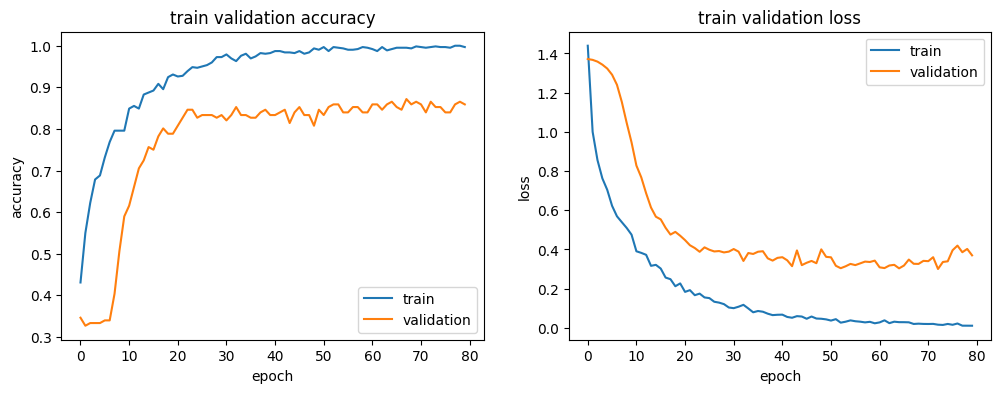

In [39]:
# Train and Validation accuracy and loss
f = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.title('train validation accuracy')
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(1,2,2)
plt.title('train validation loss')
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [40]:
y_prob = model1.predict(X1_test_scaled)
y_pred = np.argmax(y_prob, axis = -1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [41]:
# Accuracy
acc_1d = round(accuracy_score(y_pred,y1_test),2)

In [46]:
acc_1d

0.87

In [44]:
cm_1d = confusion_matrix(y1_test,y_pred)
cm_display_1d = ConfusionMatrixDisplay(confusion_matrix = cm_1d, display_labels = ['Happy', 'Relaxed', 'Sad'])

              precision    recall  f1-score   support

       Happy       0.97      0.86      0.91        65
     Relaxed       0.74      0.95      0.83        65
         Sad       0.98      0.80      0.88        65

    accuracy                           0.87       195
   macro avg       0.89      0.87      0.87       195
weighted avg       0.89      0.87      0.87       195



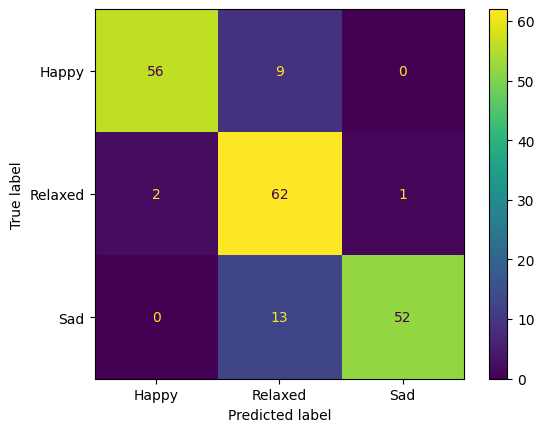

In [45]:
print(classification_report(y1_test, y_pred, target_names = ['Happy', 'Relaxed', 'Sad']))
cm_display_1d.plot()
plt.show()